# **Digit Recognizer - Lept1**

In [1]:
import sys

MODULE_FULL_PATH = '/home/leptone/Libraries'

sys.path.insert(1, MODULE_FULL_PATH)

from library import *

In [2]:
from IPython.display import IFrame

IFrame(src='https://en.wikipedia.org/wiki/handwriting', width=700, height=500)

# Load the train data

Firstly, we must load the dataset. We use [Pandas](https://pandas.pydata.org/) . I load the dataset and convert the categorical non numeric features into numeric ones.

In [3]:
train_data = pd.read_csv("train.csv", encoding="utf8")

In [4]:
test_data = pd.read_csv("test.csv", encoding="utf8")

In [5]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(train_data.dtypes)

label       int64
pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
pixel4      int64
pixel5      int64
pixel6      int64
pixel7      int64
pixel8      int64
pixel9      int64
pixel10     int64
pixel11     int64
pixel12     int64
pixel13     int64
pixel14     int64
pixel15     int64
pixel16     int64
pixel17     int64
pixel18     int64
pixel19     int64
pixel20     int64
pixel21     int64
pixel22     int64
pixel23     int64
pixel24     int64
pixel25     int64
pixel26     int64
pixel27     int64
pixel28     int64
pixel29     int64
pixel30     int64
pixel31     int64
pixel32     int64
pixel33     int64
pixel34     int64
pixel35     int64
pixel36     int64
pixel37     int64
pixel38     int64
pixel39     int64
pixel40     int64
pixel41     int64
pixel42     int64
pixel43     int64
pixel44     int64
pixel45     int64
pixel46     int64
pixel47     int64
pixel48     int64
pixel49     int64
pixel50     int64
pixel51     int64
pixel52     int64
pixel53     int64
pixel54   

In [6]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


how many samples?

In [7]:
train_data.pixel0.shape

(42000,)

In [8]:
test_data.pixel0.shape

(28000,)

<AxesSubplot:xlabel='count', ylabel='label'>

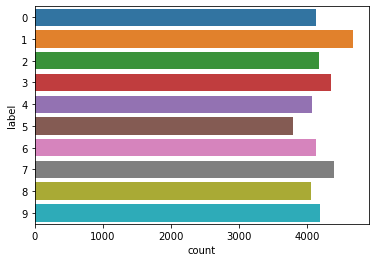

In [9]:
sns.countplot(y='label', data=train_data)

## Extract the target

In [10]:
y = train_data['label']

In [11]:
y.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [12]:
y.shape

(42000,)

# Features analysis

how much NaN value are there?

In [13]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print (train_data.isnull().sum())

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
pixel6      0
pixel7      0
pixel8      0
pixel9      0
pixel10     0
pixel11     0
pixel12     0
pixel13     0
pixel14     0
pixel15     0
pixel16     0
pixel17     0
pixel18     0
pixel19     0
pixel20     0
pixel21     0
pixel22     0
pixel23     0
pixel24     0
pixel25     0
pixel26     0
pixel27     0
pixel28     0
pixel29     0
pixel30     0
pixel31     0
pixel32     0
pixel33     0
pixel34     0
pixel35     0
pixel36     0
pixel37     0
pixel38     0
pixel39     0
pixel40     0
pixel41     0
pixel42     0
pixel43     0
pixel44     0
pixel45     0
pixel46     0
pixel47     0
pixel48     0
pixel49     0
pixel50     0
pixel51     0
pixel52     0
pixel53     0
pixel54     0
pixel55     0
pixel56     0
pixel57     0
pixel58     0
pixel59     0
pixel60     0
pixel61     0
pixel62     0
pixel63     0
pixel64     0
pixel65     0
pixel66     0
pixel67     0
pixel68     0
pixel69     0
pixel7

In [14]:
X=train_data.drop(columns=['label'])

In [15]:
X.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## SVD & PCA

First nomalize data

In [30]:
from sklearn.preprocessing import StandardScaler, Normalizer
scaler = Normalizer()
X_scal=scaler.fit_transform(X)

In [31]:
test_scal=scaler.transform(test_data)

iterate Truncated SVD varying the number of components to find variance 90%

In [26]:
from sklearn.decomposition import PCA, TruncatedSVD
variance=[]
for component in range(5,110,5):
    svd = TruncatedSVD(n_components=component, n_iter=7, random_state=42)
    svd.fit(X_scal)
    variance.append(svd.explained_variance_ratio_.sum())
    #print (component)


# of components for variance 0.9 =  90


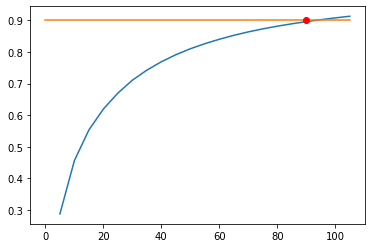

In [27]:
import matplotlib.pyplot as plt

plt.plot(np.arange(5,110,5),variance)
plt.plot([0,105],[0.90,0.90])
plt.plot(90,0.9,'ro')
for i in variance:
    if i >= 0.9:
        print('# of components for variance 0.9 = ',variance.index(i)*5)
        break

now calculate PCA the found number of components

In [34]:
from sklearn.decomposition import PCA,TruncatedSVD
pca = PCA(n_components=90)
X_new=pca.fit_transform(X_scal)

In [35]:
test_new=pca.transform(test_scal)

How many features?

In [36]:
X_new.shape

(42000, 90)

In [37]:
X_tr=pca.inverse_transform(X_new)

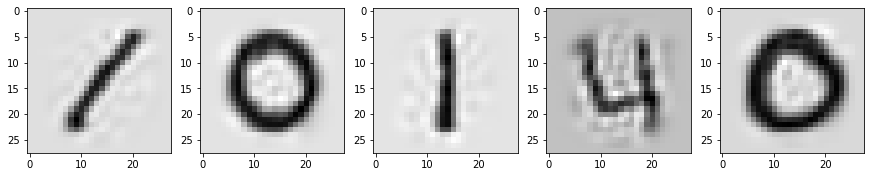

In [38]:
v = np.array(X_tr).reshape(-1, 28, 28, 1)/255

fig, ax = plt.subplots(1, 5, figsize=(15,8))
for i in range(5):
    ax[i].imshow(v[i], cmap='binary')

## Logistic Regression

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y,random_state=42,test_size=0.2)

In [44]:
rf=training(X_train,y_train,p_name='digit',model='Random Forest')

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-3)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-3)]: Done  33 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-3)]: Done 154 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-3)]: Done 357 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-3)]: Done 500 out of 500 | elapsed: 11.5min finished


In [45]:
target_names=['0','1','2','3','4','5','6','7','8','9']

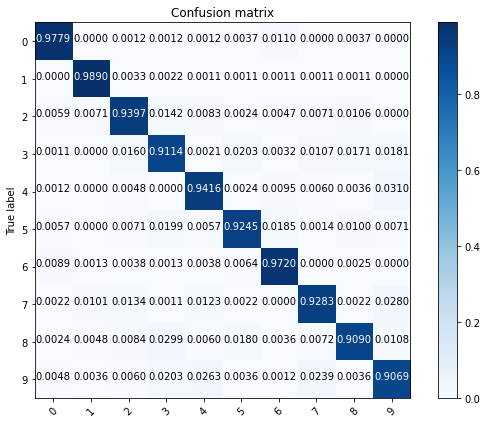

In [46]:
predic = rf.predict(X_test)
confm = confusion_matrix(y_test, predic,normalize='true')
plot_confusion_matrix(confm,target_names)

In [48]:
best_rf=rf.best_estimator_
best_rf.fit(X_new,y)
scores=cross_val_score(best_rf, X_new,y, cv=5,scoring=make_scorer(accuracy_score))
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.94 (+/- 0.00)


## Convolutional Neural Network

I tried to use CNN with PCA with very bad results. It's reasonable, because CNN need to recognize pattern.

Let's summarize. The input of our neural network is a tensor with width=28, height=28 and depth=1 where $28 \times 28$ is the dimension of the image and $ 1 $ the colour channel.  

### First step = Convolution
Instead  of  a  full  connection,  it  is  a  good  idea  to  look  for  local  regions  in  the  picture  instead  of  in  the  whole  image. Another  assumption  for  simplification,  is  to  keep  the  local  connection  weights  fixed  for  the  entire  neurons  of  the  next  layer.  This  will  connect  the  neighbor  neurons  in  the  next  layer  with  exactly  the  same  weight  to  the  local  region  of  the  previous  layer.
<img src="convolution_schematic.gif" width="750" align="center">

In this case, the yellow matrix is the filter. 

### Second step = Non linearity
For many years, sigmoid and tanh were the most popular non-linearity. The following figure  shows   the   common   types   of   nonlinearity. 
<img src="nnlin.png" width="750" align="center">

### Third step = Pooling
Spatial Pooling (also called subsampling or downsampling) reduces the dimensionality of each feature map but retains the most important information. Spatial Pooling can be of different types: Max, Average, Sum etc.
Below an example of Max Pooling operation on a Rectified Feature map (obtained after convolution + ReLU operation) by using a 2×2 window.
<img src="pooling.png" width="750" align="center">

### Fourth step = Fully connected
The Fully Connected layer is a traditional Multi Layer Perceptron that uses a softmax activation function in the output layer. The term “Fully Connected” implies that every neuron in the previous layer is connected to every neuron on the next layer. The output from the convolutional and pooling layers represent high-level features of the input image. The purpose of the Fully Connected layer is to use these features for classifying the input image into various classes based on the training dataset. 
<img src="fullconn.png" width="750" align="center">

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, MaxPooling2D,Conv2D,Flatten
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

from sklearn.ensemble import RandomForestClassifier

In [17]:
X.shape

(42000, 784)

In [18]:
X=X.to_numpy()
X = X.reshape(-1, 28, 28, 1) 


In [19]:
X.shape

(42000, 28, 28, 1)

In [20]:
test_data_cnn=test_data.to_numpy()
test_data_cnn=test_data_cnn.reshape(-1, 28, 28, 1) 

In [82]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10))



In [83]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_6 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)               

### first run

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42,test_size=0.2)

In [85]:
model.compile(optimizer='SGD',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_test, y_test))

Epoch 1/10
1050/1050 [==============================] - 41s 39ms/step - loss: 0.4643 - accuracy: 0.8986 - val_loss: 0.1221 - val_accuracy: 0.9640
Epoch 2/10
1050/1050 [==============================] - 44s 42ms/step - loss: 0.1072 - accuracy: 0.9664 - val_loss: 0.0791 - val_accuracy: 0.9746
Epoch 3/10
1050/1050 [==============================] - 42s 40ms/step - loss: 0.0748 - accuracy: 0.9766 - val_loss: 0.0715 - val_accuracy: 0.9769
Epoch 4/10
1050/1050 [==============================] - 40s 38ms/step - loss: 0.0601 - accuracy: 0.9800 - val_loss: 0.0857 - val_accuracy: 0.9746
Epoch 5/10
1050/1050 [==============================] - 40s 39ms/step - loss: 0.0511 - accuracy: 0.9837 - val_loss: 0.1157 - val_accuracy: 0.9673
Epoch 6/10
1050/1050 [==============================] - 42s 40ms/step - loss: 0.0469 - accuracy: 0.9849 - val_loss: 0.0981 - val_accuracy: 0.9724
Epoch 7/10
1050/1050 [==============================] - 41s 39ms/step - loss: 0.0340 - accuracy: 0.9893 - val_loss: 0.0635 -

### second run

In [86]:
model.compile(optimizer='Adagrad',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_test, y_test))

Epoch 1/10
1050/1050 [==============================] - 43s 41ms/step - loss: 0.0107 - accuracy: 0.9966 - val_loss: 0.0495 - val_accuracy: 0.9875
Epoch 2/10
1050/1050 [==============================] - 41s 39ms/step - loss: 0.0053 - accuracy: 0.9985 - val_loss: 0.0485 - val_accuracy: 0.9876
Epoch 3/10
1050/1050 [==============================] - 43s 41ms/step - loss: 0.0042 - accuracy: 0.9990 - val_loss: 0.0494 - val_accuracy: 0.9873
Epoch 4/10
1050/1050 [==============================] - 41s 39ms/step - loss: 0.0037 - accuracy: 0.9992 - val_loss: 0.0499 - val_accuracy: 0.9871
Epoch 5/10
1050/1050 [==============================] - 41s 39ms/step - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0.0507 - val_accuracy: 0.9870
Epoch 6/10
1050/1050 [==============================] - 42s 40ms/step - loss: 0.0029 - accuracy: 0.9995 - val_loss: 0.0507 - val_accuracy: 0.9873
Epoch 7/10
1050/1050 [==============================] - 42s 40ms/step - loss: 0.0027 - accuracy: 0.9995 - val_loss: 0.0514 -

### third run on full dataset

In [87]:
model.compile(optimizer='RMSprop',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X, y, epochs=10)

Epoch 1/10
1313/1313 [==============================] - 51s 39ms/step - loss: 0.0970 - accuracy: 0.9774
Epoch 2/10
1313/1313 [==============================] - 50s 38ms/step - loss: 0.0840 - accuracy: 0.9808
Epoch 3/10
1313/1313 [==============================] - 49s 37ms/step - loss: 0.0863 - accuracy: 0.9816
Epoch 4/10
1313/1313 [==============================] - 49s 38ms/step - loss: 0.0910 - accuracy: 0.9829
Epoch 5/10
1313/1313 [==============================] - 49s 38ms/step - loss: 0.0822 - accuracy: 0.9850
Epoch 6/10
1313/1313 [==============================] - 49s 37ms/step - loss: 0.0724 - accuracy: 0.9865
Epoch 7/10
1313/1313 [==============================] - 47s 36ms/step - loss: 0.0895 - accuracy: 0.9865
Epoch 8/10
1313/1313 [==============================] - 49s 37ms/step - loss: 0.0906 - accuracy: 0.9867
Epoch 9/10
1313/1313 [==============================] - 51s 39ms/step - loss: 0.0958 - accuracy: 0.9875
Epoch 10/10
1313/1313 [==============================] - 49s 38m

In [89]:
from sklearn import metrics
predic = model.predict(X_test)
print(metrics.classification_report(y_test, np.argmax(predic,axis=1)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       816
           1       0.99      1.00      1.00       909
           2       0.99      0.99      0.99       846
           3       1.00      0.98      0.99       937
           4       0.98      0.99      0.99       839
           5       1.00      0.98      0.99       702
           6       0.99      0.99      0.99       785
           7       0.97      1.00      0.99       893
           8       0.98      0.99      0.99       835
           9       0.99      0.96      0.98       838

    accuracy                           0.99      8400
   macro avg       0.99      0.99      0.99      8400
weighted avg       0.99      0.99      0.99      8400



# Prepare the solution

In [52]:
#solution for other models
y_pred=best_rf.predict(test_new)
iid=range(1,int((test_new[:,0].shape)[0])+1)
solution = pd.DataFrame({'ImageId':iid,'Label':y_pred})
print(solution.head(10))
solution.to_csv("solution_rf.csv", index=False)

   ImageId  Label
0        1      2
1        2      0
2        3      9
3        4      7
4        5      2
5        6      7
6        7      0
7        8      3
8        9      0
9       10      3


In [53]:
!kaggle competitions submit -c digit-recognizer -f solution_rf.csv -m "RF+PCA90"

100%|████████████████████████████████████████| 208k/208k [00:02<00:00, 77.9kB/s]
Successfully submitted to Digit Recognizer

In [90]:
##solution for cnn
y_pred=model.predict(test_data_cnn)
iid=range(1,int((test_data_cnn[:,0].shape)[0])+1)
solution = pd.DataFrame({'ImageId':iid,'Label':np.argmax(y_pred,axis = 1)})
print(solution.head(10))
solution.to_csv("solution_cnn.csv", index=False)

   ImageId  Label
0        1      2
1        2      0
2        3      9
3        4      0
4        5      3
5        6      7
6        7      0
7        8      3
8        9      0
9       10      3


In [91]:
!kaggle competitions submit -c digit-recognizer -f solution_cnn.csv -m "CNN"

100%|████████████████████████████████████████| 208k/208k [00:04<00:00, 53.1kB/s]
403 - Your team has used its submission allowance (5 of 5). This resets at midnight UTC (9.4 hours from now).
